In [1]:
import numpy as np

In [2]:
global_epsilon = 0.000000001

In [3]:
def rotation(x, a):
        return [x * np.cos(a), x * np.sin(a)]

In [4]:
def numerical_derivative_2dy(func, epsilon):

        def grad_func(x):
            func1 = func([x, epsilon + global_epsilon])
            func2 = func([x, epsilon])
            return (func1-func2) / global_epsilon

        return grad_func

In [5]:
def numerical_derivative_2dx(func, epsilon):

        def grad_func(y):
            func1 = func([global_epsilon + epsilon, y])
            func2 = func([epsilon, y])
            return (func1 - func2) / global_epsilon

        return grad_func

In [6]:
def grad_res(func, x, y):
        a = numerical_derivative_2dy(func, x)(y)
        b = numerical_derivative_2dx(func, y)(x)
        return a + b

In [7]:
def generate_dots(func, radius, cir_center, arr_shape):
    
    positions = np.array([0, 0])
    dots = np.zeros((360, arr_shape), dtype=bool)
    
    for i in range(arr_shape):
        for a in range(360):
            temp_cords = rotation(radius, a)
            temp_x = temp_cords[0] * i + cir_center[0]
            temp_y = temp_cords[1] * i + cir_center[1]
            dots[a][i] = grad_res(func, temp_y, temp_x) > 0
            if (dots[a][i - 1] == False) and (dots[a][i] == True):
                positions = np.vstack((positions, np.array([a, i - 1])))

    return positions

In [8]:
def pick_estimates(func, cir_center, radius, positions, arr_shape):
    temp_cords = rotation(radius, positions[1][0])
    best_estimate1 = cir_center[0] + temp_cords[0] * positions[1][1]
    best_estimate2 = cir_center[1] + temp_cords[1] * positions[1][1]
    
    for i in range(2, len(positions)):
        temp_cords = rotation(radius, positions[i][0] / 10)
        x = cir_center[0] + temp_cords[0] * positions[i][1]
        y = cir_center[1] + temp_cords[1] * positions[i][1]
        if func([best_estimate1, best_estimate2]) > func([x, y]):
            best_estimate1 = x
            best_estimate2 = y

    for i in range(360):
        temp_cords = rotation(radius, i)
        x = cir_center[0] + temp_cords[0] * (arr_shape - 1)
        y = cir_center[1] + temp_cords[1] * (arr_shape - 1)
        if func([best_estimate1, best_estimate2]) > func([x, y]):
            best_estimate1 = x
            best_estimate2 = y
            
    return [best_estimate1,best_estimate2]

In [9]:
def gradient_descent(func, numerical_derivative_2d, best_estimates,  radius):
    best_estimate1 = best_estimates[0]
    best_estimate2 = best_estimates[1]
    step = radius
    deriv = numerical_derivative_2d(func, best_estimate2)(best_estimate1)
    while abs(deriv) > global_epsilon:
        
        step *= 0.95
        if numerical_derivative_2d(func, best_estimate2)(best_estimate1) > 0:
            best_estimate2 -= step
        else:
            best_estimate2 += step
            
        deriv = numerical_derivative_2d(func, best_estimate2)(best_estimate1)
        
    return [best_estimate2, best_estimate1] 

In [10]:
def grad_descent_2d(func, cir_center_x, cir_center_y, radius):
    if cir_center_x == 0:
        cir_center_x = global_epsilon

    if cir_center_y == 0:
        cir_center_y = global_epsilon
    
    arr_shape = 100
    step = radius / arr_shape
    cir_center = [cir_center_x, cir_center_y]
    
    positions = generate_dots(func, step, cir_center, arr_shape)
    
    best_estimates = pick_estimates(func, cir_center, step, positions, arr_shape)
    
    best_estimates = gradient_descent(func, numerical_derivative_2dy, best_estimates, step)
    #best_estimates[0,1] = best_estimates[1,0]
    best_estimates = gradient_descent(func, numerical_derivative_2dx, best_estimates, step)
    #best_estimates[0,1] = best_estimates[1,0]
    
    return best_estimates
    

In [11]:
import time

def A(x):
    a = np.sin(x[0]) * np.exp((1 - np.cos(x[1])) ** 2)
    b = np.cos(x[1]) * np.exp((1 - np.sin(x[0])) ** 2)
    c = (x[0] - x[1]) ** 2
    return a+b+c

time1 = time.perf_counter()
print(grad_descent_2d(A, 0, 0, 8))
print(time.perf_counter() - time1)

[-1.5821304704460069, -3.1285779802922398]
1.7541014000000001


<IPython.core.display.Javascript object>


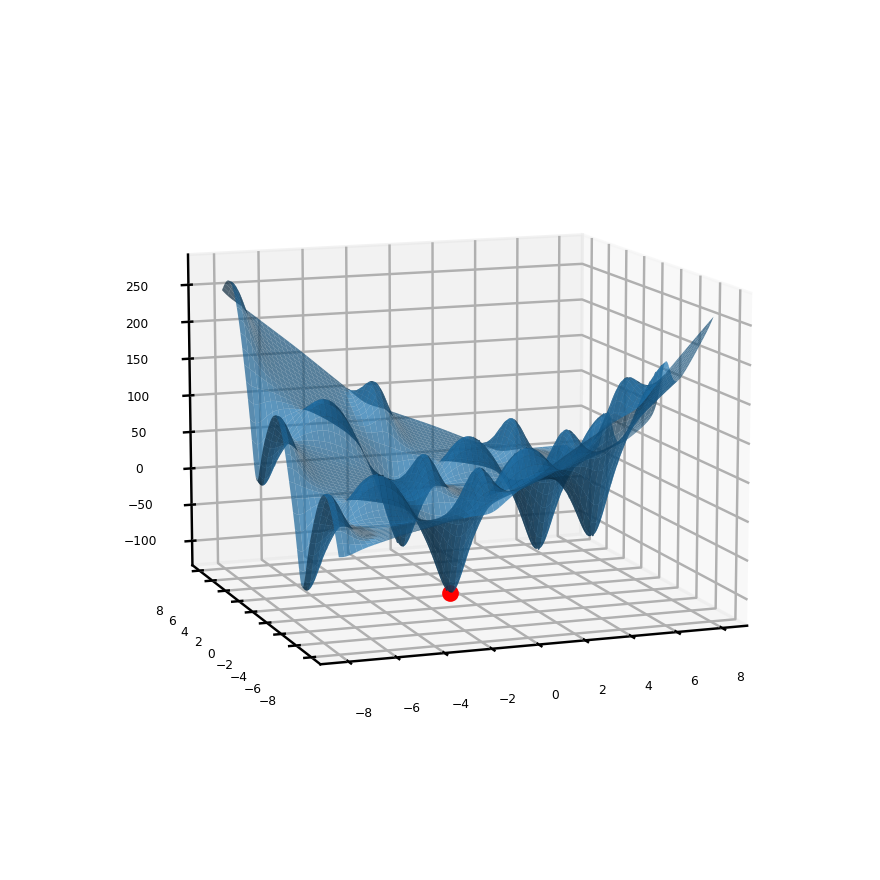

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d

%matplotlib notebook

plt.rcParams['figure.figsize']=(4,4)
plt.rcParams['figure.dpi']=200
plt.rcParams['xtick.labelsize']=4
plt.rcParams['ytick.labelsize']=4

fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d')

inp = grad_descent_2d(A, 0, 0, 8)
ax.scatter(inp[0],inp[1],A([inp[0],inp[1]]),color='red')

i = np.arange(-8, 8, 0.05)
X, Y = np.meshgrid(i, i)
Z = np.sin(X)*np.exp((1-np.cos(Y))**2)+np.cos(Y)*np.exp((1-np.sin(X))**2)+(X-Y)**2
ax.plot_surface(X, Y, Z, rstride=5, cstride=5,alpha=0.7)

plt.show()